In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 4]

In [74]:
#import libraries
import pandas as pd
import numpy as np
#read data
df = pd.read_csv('/Users/scottgleave/Downloads/Parking_Tickets.csv')
df['Date'] = df.DateIssued.str[:10]
df['Time'] = df.DateIssued.str[11:-5]
# Hormat the Hour column to have padded zeroes
df['Hour'] = pd.to_datetime(df['Time'], format= '%H:%M:%S' ).dt.hour
df['Hour'] = df.Hour.map("{:02}".format)
# Add column that takes into account if this the time is midnight, then output the hour of the TimeIssued column
df['Hour'] = np.where(df.eval("Time == '00:00:00'"), df.TimeIssued.str[:2], df.Hour)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,4,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [75]:
#read data to tickets df and create column for year
tickets = df
tickets['year'] = tickets.Date.str[:4]

In [76]:
#find rows with appeals and create new df.  Count values for appeal status categories
appeal = tickets.dropna(subset=['AppealDate'])
appealcounts = pd.value_counts(appeal['AppealStatus'].values, sort=False)
appealcounts

pending      721
granted    13422
denied     13055
dtype: int64

In [77]:
appeal['ViolationDescription'] = appeal['ViolationDescription'].str.strip()
appeal

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,RecordID,TicketNumber,DateIssued,StreetName,TimeIssued,StreetNumber,LicenseState,WaiverRequestDate,WaiverGrantedDate,AppealDate,AppealGrantedDate,ViolationDescription,AppealStatus,Location,LicensePlateAnon,Date,Time,Hour,year
1,3002,00185323,2016-04-27T11:46:05.000Z,7TH ST NE,11:46,100,VA,NaN,NaN,05/04/2016,05/05/2016,No Parking Desig HR,denied,100 7TH ST NE,114521,2016-04-27,11:46:05,11,2016
177,3178,00185510,2016-04-29T09:40:10.000Z,GARRETT ST,09:40,200,VA,NaN,NaN,04/29/2016,05/02/2016,15ft of Fire Hydrant,denied,200 GARRETT ST,108598,2016-04-29,09:40:10,09,2016
184,3185,00185517,2016-04-29T10:53:32.000Z,KING ST,10:53,700,VA,NaN,NaN,05/02/2016,05/03/2016,Permit Zone w/o Permit,granted,700 KING ST,108710,2016-04-29,10:53:32,10,2016
204,3205,00185542,2016-05-02T08:48:20.000Z,KING ST,08:48,700,VA,NaN,NaN,05/10/2016,05/12/2016,Permit Zone w/o Permit,denied,700 KING ST,45423,2016-05-02,08:48:20,08,2016
205,3206,00185543,2016-05-02T08:50:00.000Z,KING ST,08:50,700,VA,NaN,NaN,05/10/2016,05/12/2016,Permit Zone w/o Permit,denied,700 KING ST,107928,2016-05-02,08:50:00,08,2016
206,3207,00185544,2016-05-02T08:51:09.000Z,KING ST,08:51,700,VA,NaN,NaN,05/04/2016,05/05/2016,Permit Zone w/o Permit,granted,700 KING ST,105942,2016-05-02,08:51:09,08,2016
208,3209,00185546,2016-05-02T08:54:39.000Z,KING ST,08:54,700,VA,NaN,NaN,05/02/2016,05/03/2016,Permit Zone w/o Permit,granted,700 KING ST,108710,2016-05-02,08:54:39,08,2016
213,3214,00185551,2016-05-02T09:07:02.000Z,E JEFFERSON ST,09:07,400,VA,NaN,NaN,05/02/2016,05/02/2016,No Parking any time,denied,400 E JEFFERSON ST,80938,2016-05-02,09:07:02,09,2016
237,3238,00185575,2016-05-02T10:23:19.000Z,KENT RD,10:23,300,VA,NaN,NaN,05/03/2016,05/04/2016,Permit Zone w/o Permit,denied,300 KENT RD,167666,2016-05-02,10:23:19,10,2016
272,3273,00185621,2016-05-02T12:38:16.000Z,WATER ST LOT,12:38,0,VA,NaN,NaN,05/04/2016,05/05/2016,Violation of Meter Ordinance,granted,0 WATER ST LOT,107181,2016-05-02,12:38:16,12,2016


In [78]:
#display percentages for appeal status categories
appeal.AppealStatus.value_counts(normalize=True)

granted    0.493492
denied     0.479999
pending    0.026509
Name: AppealStatus, dtype: float64

In [79]:
#what percent of appeals were successful by type of offense?

#get value counts for violationdescription
appealcountsbyoffense = pd.value_counts(appeal['ViolationDescription'].values, sort=False)
#newdataframe with only appeals that were granted
appealsgranted = appeal[(appeal['AppealStatus'] == 'granted')]
#get value counts for violationdescription for appeals that were granted
appealcountsgranted = pd.value_counts(appealsgranted['ViolationDescription'].values, sort=False)
#combine values count dfs and calculate percentage of appeals granted by violation description
appealgranteddf = pd.concat([appealcountsbyoffense, appealcountsgranted], axis=1)
appealgranteddf['perc'] = appealgranteddf[1]/appealgranteddf[0]
appealgranteddf.sort_values(by=['perc'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  # Remove the CWD from sys.path while we load stuff.


,0,1,perc
15ft of Fire Hydrant,145,38,0.262069
Void,13,4,0.307692
Occupying Adjoining Space,341,106,0.310850
12 Inches From Curb,202,63,0.311881
Blocking Drive,282,92,0.326241
Bus or Taxi Zone,49,16,0.326531
LT Side to Curb,566,192,0.339223
No Parking any time,2725,996,0.365505
Parking 20ft of Intersection,278,104,0.374101
Curb Painted Yellow,505,190,0.376238


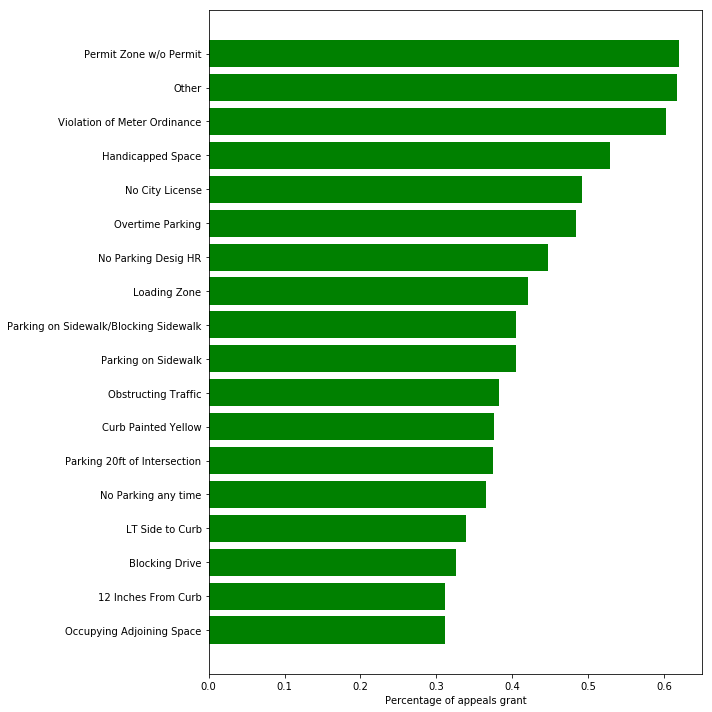

In [96]:
appealgranteddfshort = appealgranteddf[(appealgranteddf[0] > 200)]
appealgranteddfshort = appealgranteddfshort.sort_values(by=['perc'])
ind = appealgranteddfshort.index.values
fig, ax = plt.subplots()
ax.barh(ind,appealgranteddfshort['perc'],  align='center',
        color='green')
ax.set_xlabel('Percentage of appeals grant')
plt.rcParams['figure.figsize'] = [10, 10]
plt.tight_layout()
plt.savefig('appealsuccess.png')

In [81]:
#value counts for days when there were many appeals
appealbyday = pd.value_counts(appeal['Date'].values, sort=True)
appealbyday.head()

2004-02-17    120
2004-02-18    107
2003-02-25     92
2003-02-24     88
2004-02-19     81
dtype: int64

In [82]:
#Create df to figure out how percentage of appeals granted changed over time
#value counts by year for total appeals
appealbyyear = pd.value_counts(appeal['year'].values, sort = False)
#value counts by year for appeals granted
appealgrantbyyear = pd.value_counts(appealsgranted['year'].values, sort = False)
#combine value count dfs and calculate yearly percentage granted
appealsuccessyear = pd.concat([appealbyyear, appealgrantbyyear], axis=1)
appealsuccessyear['perc'] = appealsuccessyear[1]/appealsuccessyear[0]
appealsuccessyear

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  import sys


,0,1,perc
1999,241,133,0.551867
2000,1778,919,0.516873
2001,3109,1825,0.587005
2002,2346,660,0.281330
2003,2728,1081,0.396261
2004,3041,1444,0.474844
2005,2283,1068,0.467806
2006,1367,548,0.400878
2007,919,324,0.352557
2008,742,354,0.477089


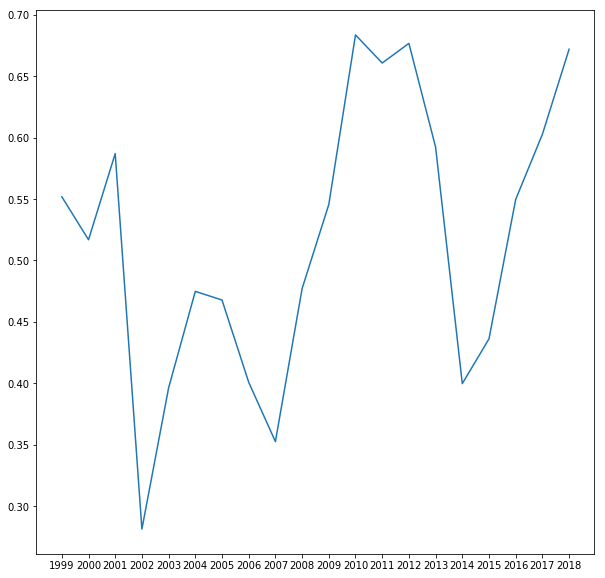

<Figure size 720x720 with 0 Axes>

In [83]:
#Plot percentage of successful appeals by year
plt.plot(appealsuccessyear['perc'])
plt.show()
plt.tight_layout()
plt.savefig('appealsuccess.png')

In [84]:
#pendings by year
#new df for pending tickets, then perform value count
pending = tickets[(tickets['AppealStatus'] == 'pending')]
pendingbyyear = pd.value_counts(pending['year'].values, sort = True)
pendingbyyear

2004    124
2001     97
2000     83
2003     83
2005     78
2002     77
2006     69
2008     31
2014     24
2015     19
2007     19
2016     16
2017     12
1999      8
2009      5
2018      5
2010      3
2011      2
2013      2
2012      1
dtype: int64

In [85]:
#time between request and decision on appeal

#sort dataframe by date and remove last 10 rows to remove incorrect dates that cannot be converted to datetime
#and convert to datetime
tickets = tickets.sort_values(by=['Date'], ascending = True)
tickets = tickets[:-10]
tickets['Date'] = pd.to_datetime(tickets['Date'])
#sort dataframe by granted date, remove incorrect dates
appealgrantdf = tickets.dropna(subset=['AppealGrantedDate'])
appealgrantdf['tempcol'] = appealgrantdf.AppealGrantedDate.str[-4:]
appealgrantdf = appealgrantdf.sort_values(by=['tempcol'], ascending = False)
appealgrantdf = appealgrantdf[10:]
#sort dataframe by granted date, remove incorrect dates
appealgrantdf['tempcol'] = appealgrantdf.AppealDate.str[-4:]
appealgrantdf = appealgrantdf.sort_values(by=['tempcol'], ascending = False)
appealgrantdf = appealgrantdf[10:]
#convert formats to datetime
appealgrantdf['AppealDate'] = pd.to_datetime(appealgrantdf['AppealDate'])
appealgrantdf['AppealGrantedDate'] = pd.to_datetime(appealgrantdf['AppealGrantedDate'])
appealgrantdf = appealgrantdf.drop('tempcol', axis = 1)

#figure out date range
appealgrantdf['daylength'] = appealgrantdf['AppealGrantedDate'] - appealgrantdf['AppealDate']
appealgrantdf['daylength'].describe()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


count                       26474
mean      13 days 13:56:46.904887
std      126 days 00:30:34.854173
min           -722 days +00:00:00
25%               1 days 00:00:00
50%               3 days 00:00:00
75%               6 days 00:00:00
max            3164 days 00:00:00
Name: daylength, dtype: object

In [86]:
#only get tickets that have appeal granted date
#Convert to datetime
appealgrantdf = tickets.dropna(subset=['AppealGrantedDate'])
appealgrantdf['tempcol'] = appealgrantdf.AppealGrantedDate.str[-4:]
appealgrantdf = appealgrantdf.sort_values(by=['tempcol'], ascending = False)
appealgrantdf = appealgrantdf[10:]
appealgrantdf['tempcol'] = appealgrantdf.AppealDate.str[-4:]
appealgrantdf = appealgrantdf.sort_values(by=['tempcol'], ascending = False)
appealgrantdf = appealgrantdf[10:]
appealgrantdf['AppealDate'] = pd.to_datetime(appealgrantdf['AppealDate'])
appealgrantdf['AppealGrantedDate'] = pd.to_datetime(appealgrantdf['AppealGrantedDate'])
appealgrantdf = appealgrantdf.drop('tempcol', axis = 1)

#figure out date range
appealgrantdf['daylength'] = appealgrantdf['AppealGrantedDate'] - appealgrantdf['AppealDate']
appealgrantdf['daylength'].describe()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


count                       26474
mean      13 days 13:56:46.904887
std      126 days 00:30:34.854173
min           -722 days +00:00:00
25%               1 days 00:00:00
50%               3 days 00:00:00
75%               6 days 00:00:00
max            3164 days 00:00:00
Name: daylength, dtype: object

In [87]:
#cars successful with appeals multiple times

#create dataframe from granted, value count by license plate
successful = tickets[(tickets['AppealStatus'] == 'granted')]
successfulcount = pd.value_counts(successful['LicensePlateAnon'].values, sort=True)
successfulmean = successfulcount.mean()
print(successfulcount.head())
print(successfulmean)

180337    37
125415    25
75826     23
16808     22
72071     21
dtype: int64
1.2662956324875012


[37, 25, 23, 22, 21, 20]


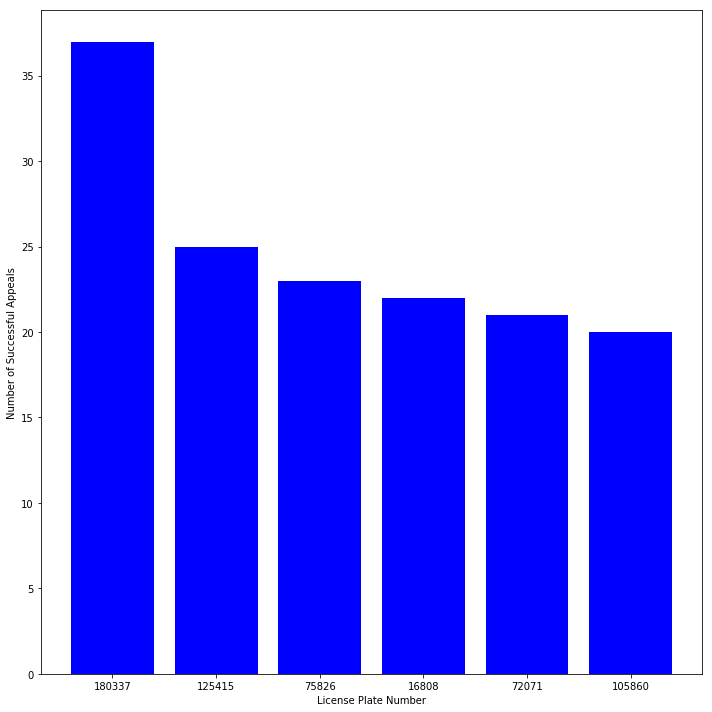

In [88]:
plot1 = successfulcount[:6]
ind2 = plot1.index.values
plot1 = plot1.tolist()
#plot1.append(0)
#plot1.append(successfulmean)
print(plot1)

indstr = [str(x) for x in ind2]
#indstr.append('')
#indstr.append("avg")
#ind2 = ["one", 'two', 'three', 'four', 'five', 'six']
fig2, ax2 = plt.subplots()
ax2.bar(indstr,plot1,  align='center',
        color='blue')
ax2.set_xlabel('License Plate Number')
ax2.set_ylabel('Number of Successful Appeals')
plt.rcParams['figure.figsize'] = [10, 10]
plt.tight_layout()
plt.savefig('Appeal Outliers.png')

In [89]:
#percent appealed by year

#count value of tickets by year, add to appeals by year, and calculate percentage
ticketsbyyear = pd.value_counts(tickets['year'].values, sort = False)
percentappealtime = pd.concat([appealbyyear, ticketsbyyear], axis=1)
percentappealtime['perc'] = percentappealtime[0]/percentappealtime[1]
percentappealtime

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """


,0,1,perc
1999,241.0,11152,0.021610
2000,1778.0,45567,0.039019
2001,3109.0,42169,0.073727
2002,2346.0,24912,0.094171
2003,2728.0,26216,0.104059
2004,3041.0,29813,0.102002
2005,2283.0,26757,0.085323
2006,1367.0,19103,0.071559
2007,919.0,22526,0.040797
2008,742.0,17181,0.043187


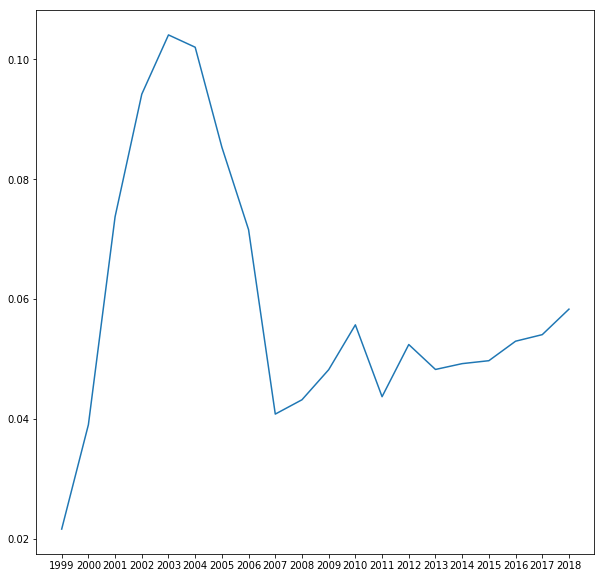

In [90]:
#plot percent of tickets appealed over time
plt.plot(percentappealtime['perc'])
plt.show()

In [91]:
#percentage breakdown of tickets with waiver by violation description
waiver = tickets.dropna(subset=['WaiverRequestDate'])
waiver.ViolationDescription.value_counts(normalize=True)

Overtime Parking                0.915846
Violation of Meter Ordinance    0.083591
Void                            0.000563
Name: ViolationDescription, dtype: float64

In [92]:
ticketsbyyear = pd.value_counts(tickets['year'].values, sort = False)
#value counts by year for appeals granted
appealgrantbyyear = pd.value_counts(appealsgranted['year'].values, sort = False)
#combine value count dfs and calculate yearly percentage granted
appealsuccesstotal = pd.concat([ticketsbyyear, appealgrantbyyear], axis=1)
appealsuccesstotal['perc'] = appealsuccesstotal[1]/appealsuccesstotal[0]
appealsuccesstotal

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """


,0,1,perc
1999,11152,133.0,0.011926
2000,45567,919.0,0.020168
2001,42169,1825.0,0.043278
2002,24912,660.0,0.026493
2003,26216,1081.0,0.041234
2004,29813,1444.0,0.048435
2005,26757,1068.0,0.039915
2006,19103,548.0,0.028687
2007,22526,324.0,0.014383
2008,17181,354.0,0.020604


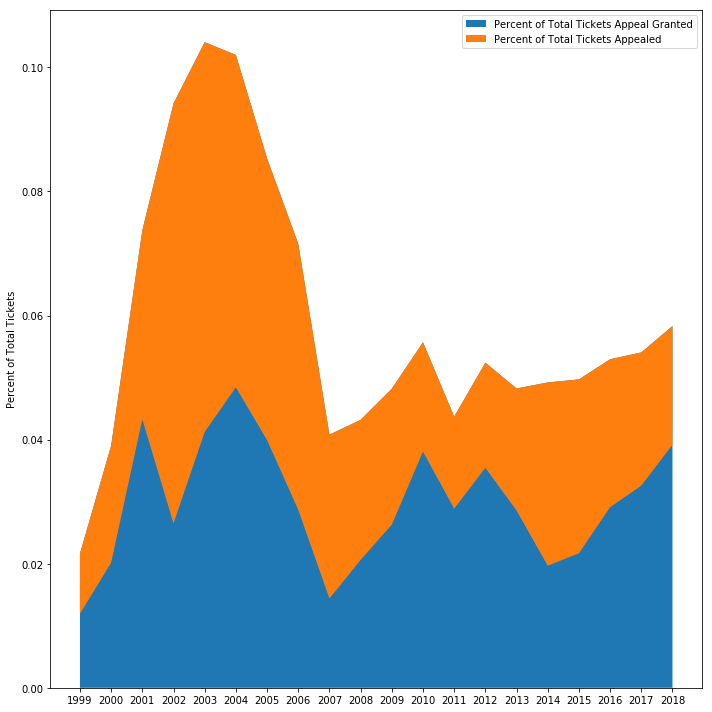

In [97]:
x = percentappealtime.index.values
x1 = appealsuccessyear.index.values
y1 = percentappealtime['perc']
y2 = appealsuccesstotal['perc']
fig3, ax3 = plt.subplots()
labels = ['Percent of Total Tickets Appeal Granted', 'Percent of Total Tickets Appealed']

ax3.stackplot(x,y1, (y2-y1), labels = labels)
ax3.legend(loc=1)
ax3.set_ylabel('Percent of Total Tickets')
plt.rc('axes', labelsize = 10)
#plt.show()
plt.rc('ytick', labelsize=10)

plt.tight_layout()
plt.savefig('appealsattempted.png')


In [108]:
#percent appealed overall

#count value of tickets by year, add to appeals by year, and calculate percentage
ticketsbyyear = pd.value_counts(tickets['year'].values, sort = False)
percentappealtime = pd.concat([appealbyyear, ticketsbyyear], axis=1)
totalappealed = pd.Series(percentappealtime[0]).sum()
totaltickets = pd.Series(percentappealtime[1]).sum()
appealpercent = totalappealed/totaltickets
appealpercent

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """


0.06248420607681245